# <b> <font color=red> CUSTOMER ATTRITION ANALYSIS </b>

## <b> <font color=blue> Project Statement: </b>
#### Verizonet, a telecom company in California, faces a challenge: high customer attrition. Despite a strong sales team, only 43% of new customers continue services. Competitors' advancements contribute to this. To combat it, a task force including a Data Science team is formed. Objectives: analyze data, predict customer departures, and suggest retention tactics. Success could lead to growth and stability.

##### <font color=blue> <b> Customer attrition: Customer attrition, also known as customer churn, refers to the phenomenon where customers discontinue their relationship with a company or stop using its products or services. It is a crucial metric for businesses across various industries, as retaining existing customers is often more cost-effective than acquiring new ones.

## <b><font color=blue> Project Objective</b>

#### <b> The objective of this exercise is to build a model to predict the customer who can depart, using</b>
<b> 
historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts </b> ) <b>
1. Highlight any trend in data, deep insight, novel steps that you tak <b>e
2. Highlight next steps and improvement <b>s.
3. Apply classification machine learning algorithms and evaluate it

## <b><font color=blue>Project Steps</b>

<h4><b>Data Collection and Preprocessing:</b></h4>
<h4><b>Feature Selection and Engineering:</b></h4>
<h4><b>Splitting the Data:</b></h4>
<h4><b>Model Selection:</b></h4>

<h4><b>Training the Model:</h4></b>
<h4><b>Model Evaluation:</b></h4>
<h4><b>Model Deployment:</b></h4>
<h4><b>Monitoring and Maintenance:</b></h4>






## <font color=blue> Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## <font color=blue> Loading the dataset

In [2]:
datas=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\verizonet_data.csv")

<b>Here is a short description of each feature:</b>

<p>Customer ID: Unique identifier for each customer.</p>
<p>Referred a Friend: Indicates whether the customer was referred by a friend (binary: Yes/No).</p>


<p>Number of Referrals: Number of customers referred by the current customer.</p>
<p>Tenure in Months: Duration of the customer's relationship with the company in months.</p>
<p>Offer: Type of offer or promotion received by the customer.</p>
<p>Phone Service: Indicates whether the customer has phone service (binary: Yes/No).</p>
<p>Avg Monthly Long Distance Charges: Average monthly charges for long-distance calls.
<p>Multiple Lines: Indicates whether the customer has multiple phone lines (binary: Yes/No).wg
<p>Internet Service: Type of internet service subscribed by the customer.
<p>Internet Type: Specific type of internet service subscribed (e.g., DSL, Fiber)
<p>Online Security: Indicates whether the customer has online security service (binary: Yes/No).
<p>Online Backup: Indicates whether the customer has online backup service (binary: Yes/No).
<p>Device Protection Plan: Indicates whether the customer has a device protection plan (binary: Yes/No).
<p>Premium Tech Support: Indicates whether the customer has premium tech support (binary: Yes/No).
<p>Streaming TV: Indicates whether the customer subscribes to streaming TV service (binary: Yes/No).
<p>Streaming Movies: Indicates whether the customer subscribes to streaming movies service (binary: Yes/No).
<p>Streaming Music: Indicates whether the customer subscribes to streaming music service (binary: Yes/No).
<p>Unlimited Data: Indicates whether the customer has unlimited data plan (binary: Yes/No).
<p>Contract: Type of contract subscribed by the customer (e.g., month-to-month, one-year, two-year).
<p>Paperless Billing: Indicates whether the customer opts for paperless billing (binary: Yes/No).
<p>Payment Method: Method of payment used by the customer (e.g., credit card, electronic check).
<p>Monthly Charge: Total monthly charges incurred by the customer.
<p>Total Regular Charges: Total regular charges billed to the customer.
<p>Total Refunds: Total refunds issued to the customer.
<p>Total Extra Data Charges: Total extra data charges incurred by the customer.
<p>Total Long Distance Charges: Total long-distance charges billed to the customer.
<p>Gender: Gender of the customer.
<p>Age: Age of the customer.
<p>Under 30: Indicates whether the customer is under 30 years old (binary: Yes/No).
<p>Senior Citizen: Indicates whether the customer is a senior citizen (binary: Yes/No).
<p>Married: Indicates whether the customer is married (binary: Yes/No).
<p>Dependents: Indicates whether the customer has dependents (binary: Yes/No).
<p>City: City of residence of the customer.
<p>Zip Code: Zip code of the customer's residence.
<p>Population: Population of the city where the customer resides.
<p>Churn Status: Indicates whether the customer has churned (binary: Yes/No).
<p>CLTV: Customer Lifetime Value, a prediction of the net profit attributed to the entire future relationship with a customer.
<p>Churn Category: Category of churn (if applicable).
<p>Churn Reason: Reason for churn (if available).
<p>Total Customer Svc Requests: Total number of customer service requests made by the customer.
<p>Product/Service Issues Reported: Indicates whether the customer reported any product or service issues (binary: Yes/No).
<p>Customer Satisfaction rate: Rate of customer satisfaction.

In [3]:
datas.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

##### <b> The <font color=blue>"info" </font>function or method in Python is typically used to display a concise summary of a Dataset, which is a fundamental data structure in the pandas library.The "info" function provides useful information about the DataFrame's structure and content. 
##### <b> After using the info function we can clearly knew the null values and not null values count of each coloumns and also find the data types of each coloumns.<font color=blue>42</font> coloumns are present in the dataset.Data types are <font color=blue>float,int and Object.</font>Most commmonly occuring data types are object

In [5]:
datas.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


#### The describe() function in pandas is a powerful tool for quickly summarizing the statistical properties of numerical columns within a DataFrame. When applied to a DataFrame, the describe() function provides the following statistics for each numerical column:

<p>Count: The number of non-null values in the column.</p>
<p>Mean: The average value of the column.  </p>
<p>Standard Deviation (std): The measure of the dispersion of values around the mean.</p>
<p>Minimum: The smallest value in the column.</p>
<p>25th Percentile (25%): The value below which 25% of the observations fall.</p>
<p>50th Percentile (50%) or Median: The value below which 50% of the observations fall.</p>
<p>75th Percentile (75%): The value below which 75% of the observations fall.</p>
<p>Maximum: The largest value in the column.</p>


In [6]:
datas.isnull()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
7040,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
7041,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True


#### <font color=blue> isnull </font>function is used for finding the null values in the each coloumns of the Dataset.

In [7]:
datas.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

#### isnull sum function is used for the sum of the null values in each coloumn.here 5 columns have the null values.Those are <font color=blue>Offer,  Internet Type , Churn Category,  Churn Reason , Customer Satisfaction rate                           

<b>Heat Map Representation of Null values in the Coloumns</b>

<Axes: >

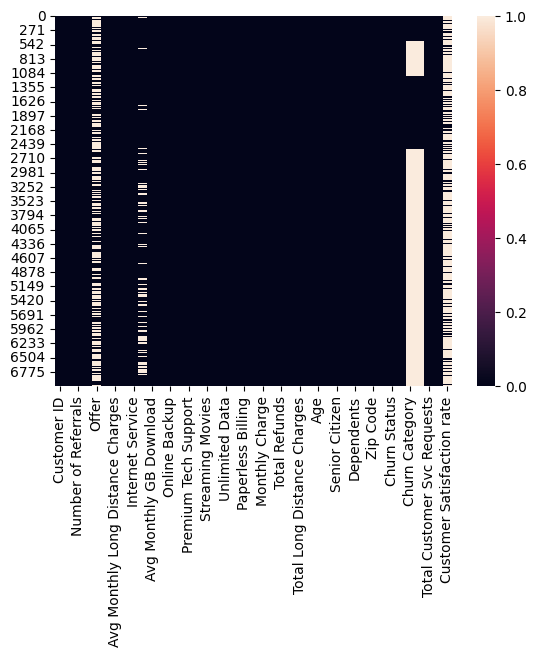

In [8]:
sns.heatmap(datas.isnull())

####  heapmap representation of null values in the coloumns.White color indicate the null values,null values present in the coloumns Offer,InternetService,Churn Category,Customer satisfaction rate

Null Values Reprenting Inthe Coloumns

In [9]:
datas[['Offer','Internet Type' ,'Churn Category','Churn Reason','Customer Satisfaction rate']].isnull().sum()

Offer                         3877
Internet Type                 1526
Churn Category                5174
Churn Reason                  5174
Customer Satisfaction rate    5209
dtype: int64

#### Here mentioned that the null values presenting  in the coloumns and sum of the null values

### <b>Handling The Null Values

<b>Finding the mode of a Offer Coloumn</b>

In [10]:
datas['Offer'].mode()

0    Offer B
Name: Offer, dtype: object

#####  mode of the Offer coloumn is Offer B

In [11]:
mode_offer=datas['Offer'].mode()[0]
print(mode_offer)
datas['Offer'].fillna(mode_offer, inplace=True)


Offer B


##### Replacing the null values with mode in offer coloumn

In [12]:
mode_internettype=datas['Internet Type'].mode()[0]                                                                              
datas['Internet Type'].fillna(mode_internettype, inplace=True)

mode_churncat=datas['Internet Type'].mode()[0]                                                                              
datas['Churn Category'].fillna(mode_churncat, inplace=True)


mode_churnreason=datas['Internet Type'].mode()[0]                                                                              
datas['Churn Reason'].fillna(mode_churnreason, inplace=True)





In [13]:
median=datas['Customer Satisfaction rate'].median()
print(median)
datas['Customer Satisfaction rate'].fillna(median,inplace=True)






3.0


#### Replacing the null values with mode in Internet Type,Churn Category,Churn Reason and mean withCustomer Satisfaction rate


In [14]:
datas.isnull().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

<Axes: >

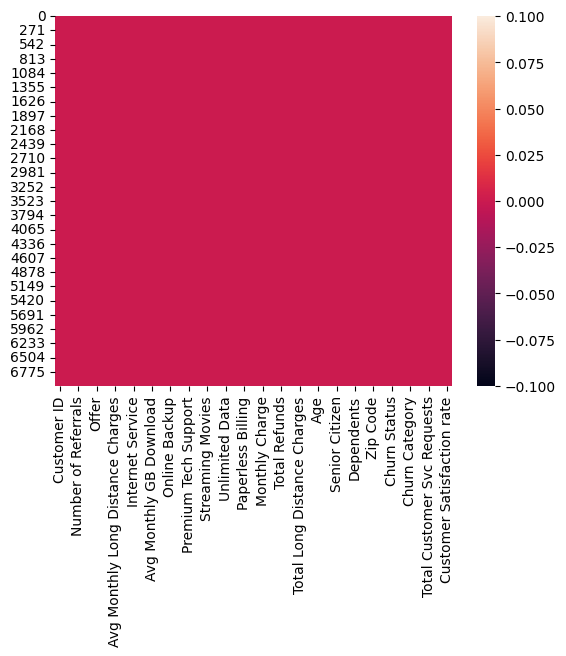

In [15]:
sns.heatmap(datas.isnull())

##### Here i am checking the null values in each column.Not null values in each coloumns.heatmap representation show that there is no null values in each coloumns after the replacing of null values

In [16]:
datas.duplicated().sum()

0

there is no duplicated values in each coloumns


In [17]:
cleaned_datas=datas.copy

After the removing the null values and duplicated values, the dataset just  copying into cleaned dataset

In [18]:
numerical_data =datas[['Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Regular Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Age','Zip Code','Population','Churn Status','CLTV','Total Customer Svc Requests','Product/Service Issues Reported','Customer Satisfaction rate']]
print(numerical_data)     


      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        9   
1                                 48.85                       19   
2                                 11.33                       57   
3                                 19.76                       13   
4                                  6.33                       15   
...                        

<b>Finding The Skewness Of All The Numerical columns</b>

In [19]:
# Calculate skewness for numerical columns only (including float)
skewness_results = {}
numeric_cols = datas.select_dtypes(include=['int', 'float']).columns  # Select numeric columns (int and float)

for col in numeric_cols:
    skewness = skew(datas[col])  # Calculate skewness for each numerical column
    skewness_results[col] = skewness

# Print skewness results for numerical columns
for col, skewness in skewness_results.items():
    print(f"Skewness of '{col}': {skewness:.4f}")


Skewness of 'Number of Referrals': 1.4458
Skewness of 'Tenure in Months': 0.2405
Skewness of 'Avg Monthly Long Distance Charges': 0.0492
Skewness of 'Avg Monthly GB Download': 1.2110
Skewness of 'Monthly Charge': -0.2229
Skewness of 'Total Regular Charges': 0.9636
Skewness of 'Total Refunds': 4.3276
Skewness of 'Total Extra Data Charges': 4.0947
Skewness of 'Total Long Distance Charges': 1.2380
Skewness of 'Age': 0.1622
Skewness of 'Zip Code': -0.2096
Skewness of 'Population': 0.9127
Skewness of 'Churn Status': 1.0628
Skewness of 'CLTV': -0.3115
Skewness of 'Total Customer Svc Requests': 1.3589
Skewness of 'Product/Service Issues Reported': 2.9061
Skewness of 'Customer Satisfaction rate': -0.2759


<b>Skewness provides information about the symmetry or asymmetry of the distribution of data values. By examining skewness, analysts can quickly understand whether a dataset is symmetrically distributed or exhibits skewness towards higher or lower values.<b>

<b>Skewness Value = 0:</b>

A skewness value of 0 indicates a perfectly symmetrical distribution.
The dataset's distribution is balanced, with equal tails on both sides of the peak.
<b>Skewness Value > 0 (Positive Skewness):,</b>

Positive skewness indicates a right-skewed distribution.
The median is typically less than the mean in a right-skewed distribution because of the influence of the higher values.
<b>Skewness Value < 0 (Negative Skewness):</b>

Negative skewness indicates a left-skewed distribution.
The tail of the distribution extends towards lower values, pulling the mean towards the left.

In [20]:
# Calculate overall skewness
overall_skewness = sum(skewness_results.values()) / len(skewness_results)

print(f"Overall skewness of the dataset: {overall_skewness:.4f}")

Overall skewness of the dataset: 1.1149


In [21]:
skewness=skew(numerical_data)
if (skewness > 0).any():
    print("The dataset has positive skewness in one or more columns.")
else:
    print("The dataset does not have positive skewness in any column.")

The dataset has positive skewness in one or more columns.


<b> box plot representation shows the outliers in Number of Referrals,Avg monthly GB download,Total Refund,Total Extra Data Charges,Total Long Distance Charges,P,opulation,Total Customer Svc Request,Product/Service Issues Reported,Customer Satisfaction rate </b>

### <b>Histogram Representation Of Numerical Coloumns</b>

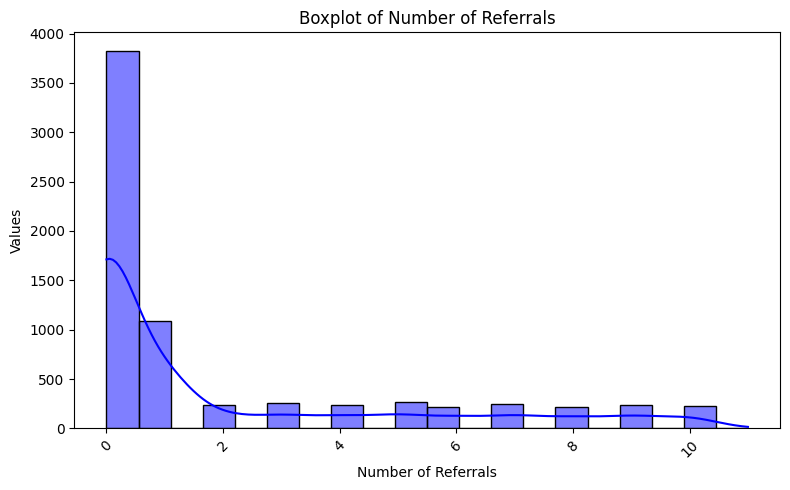

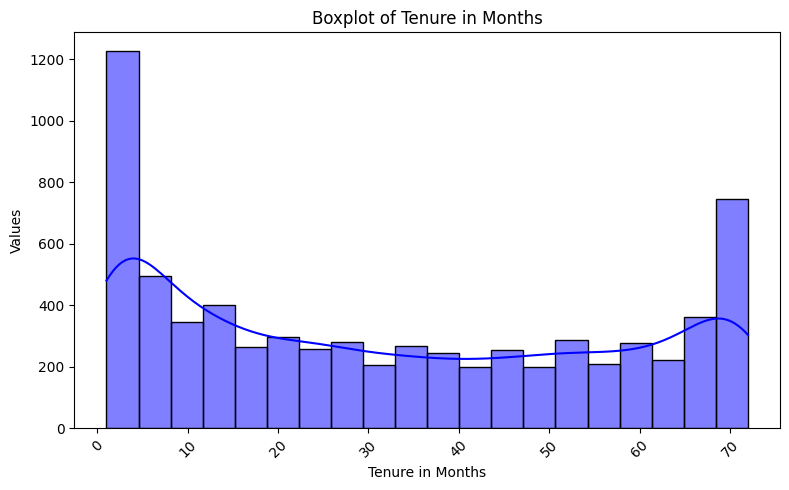

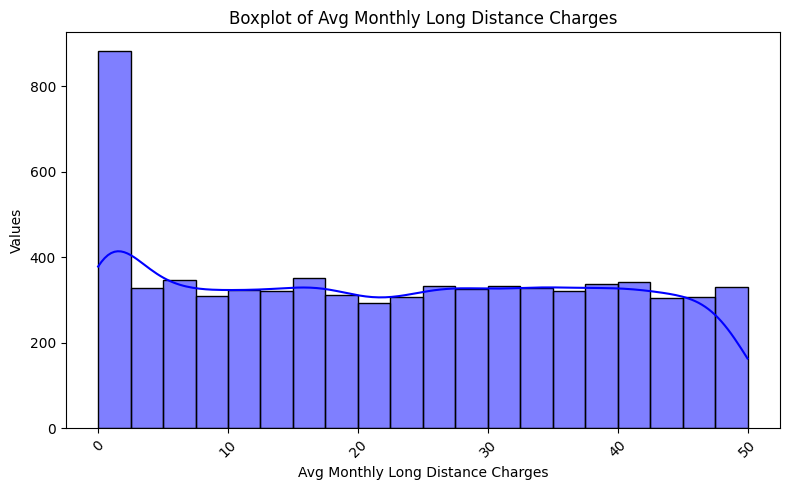

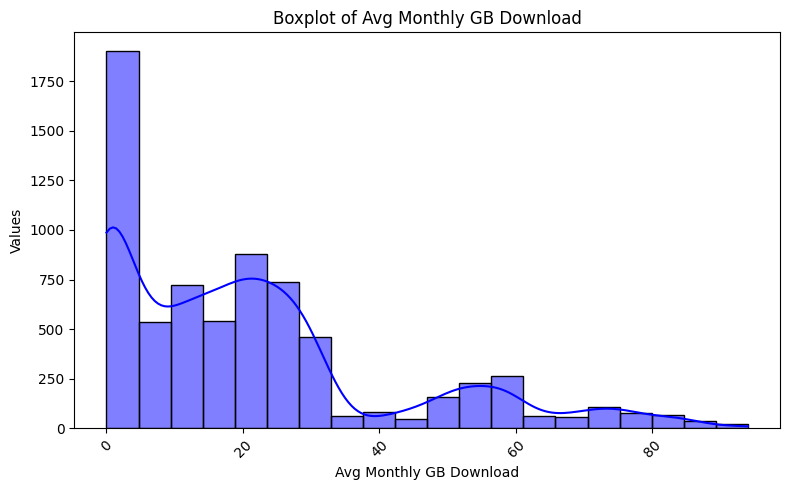

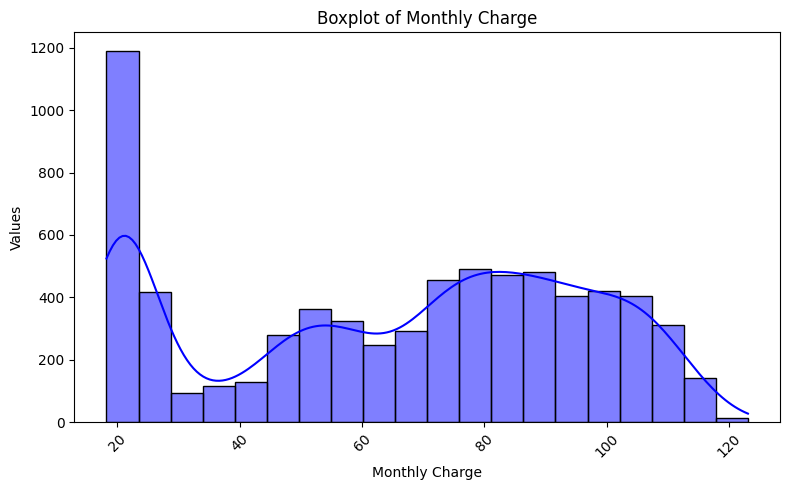

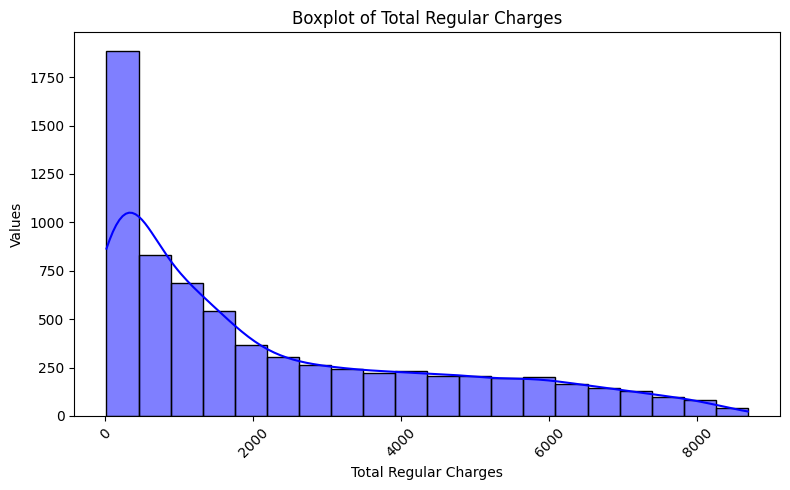

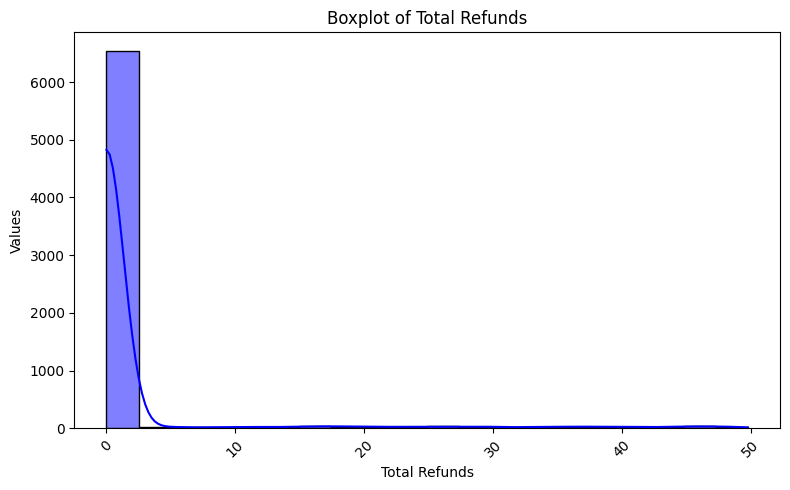

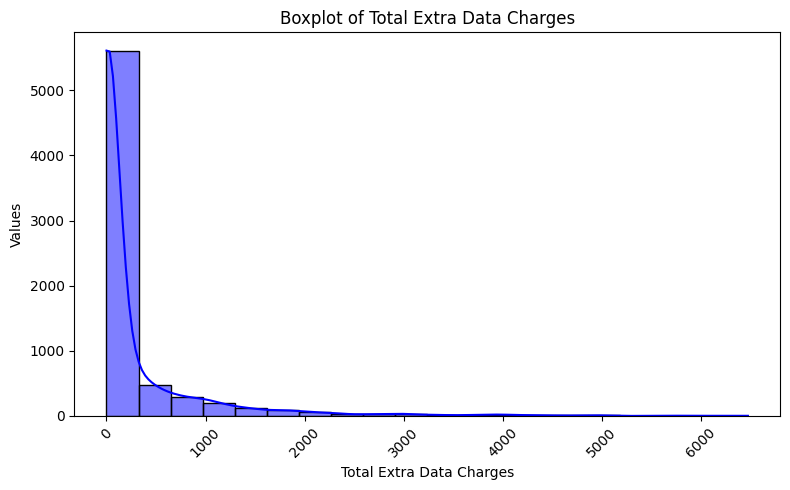

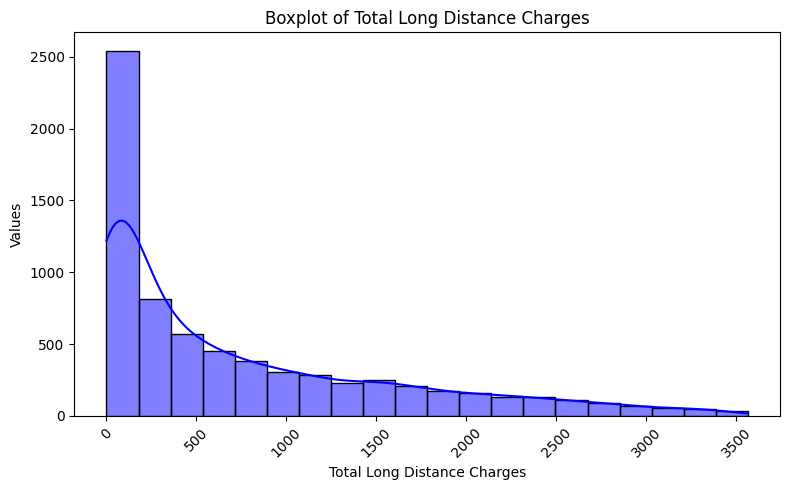

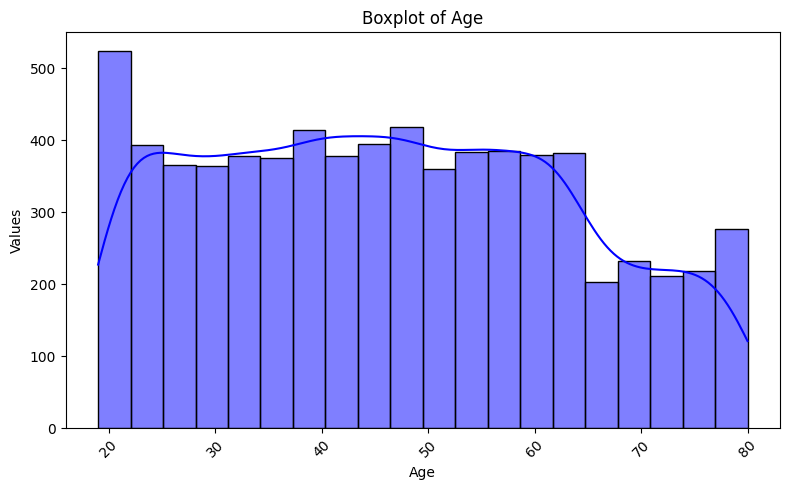

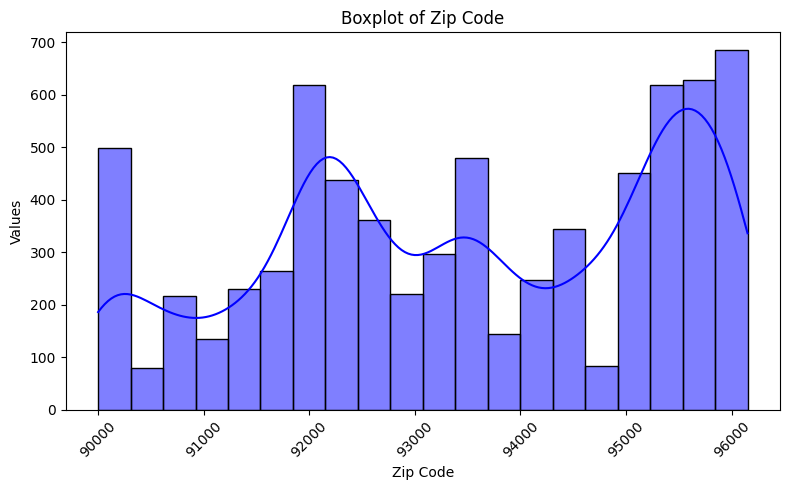

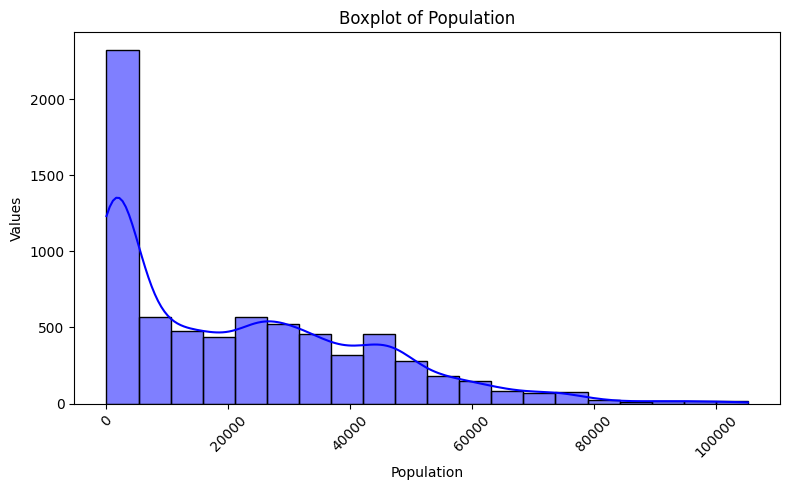

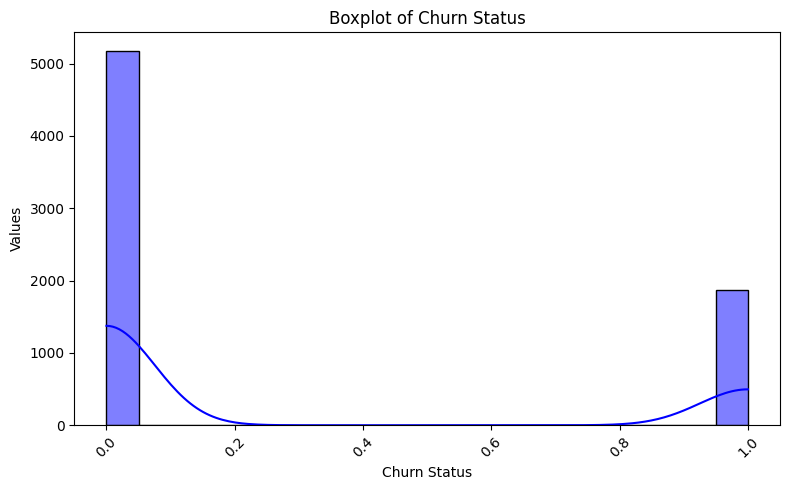

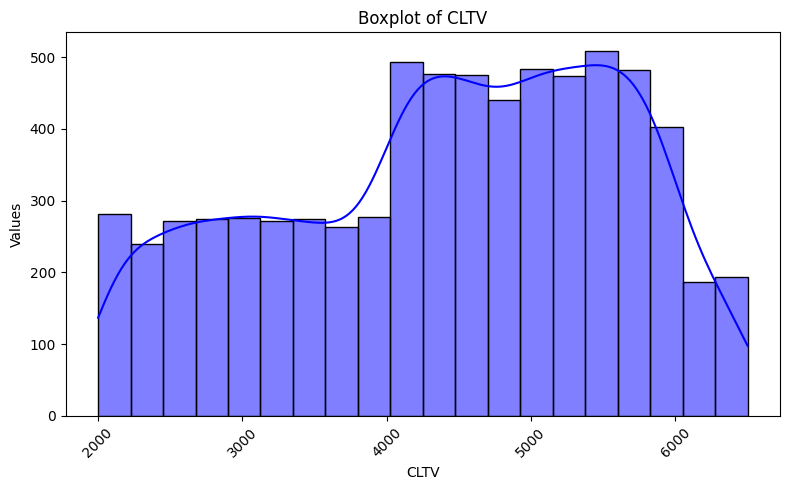

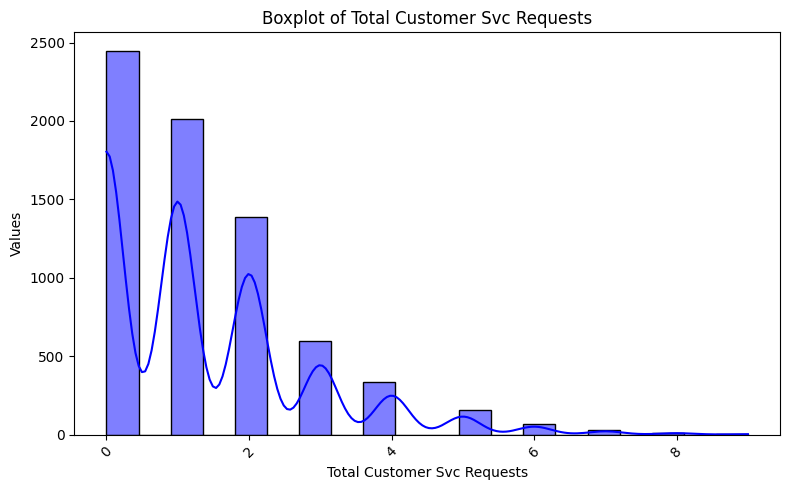

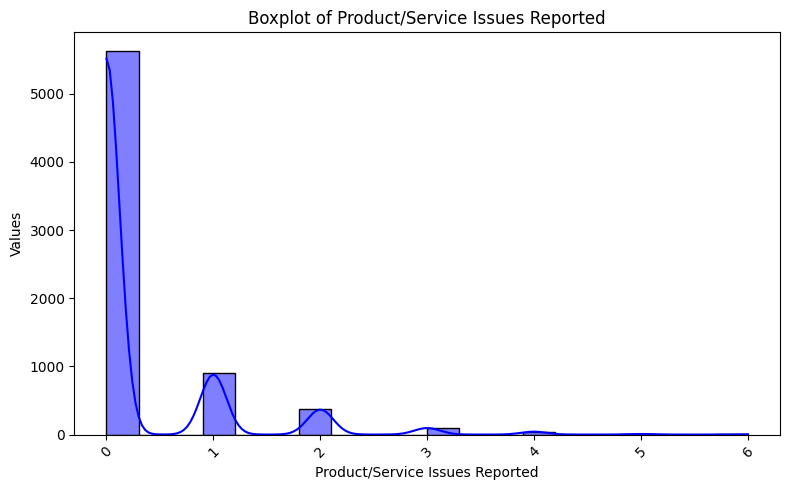

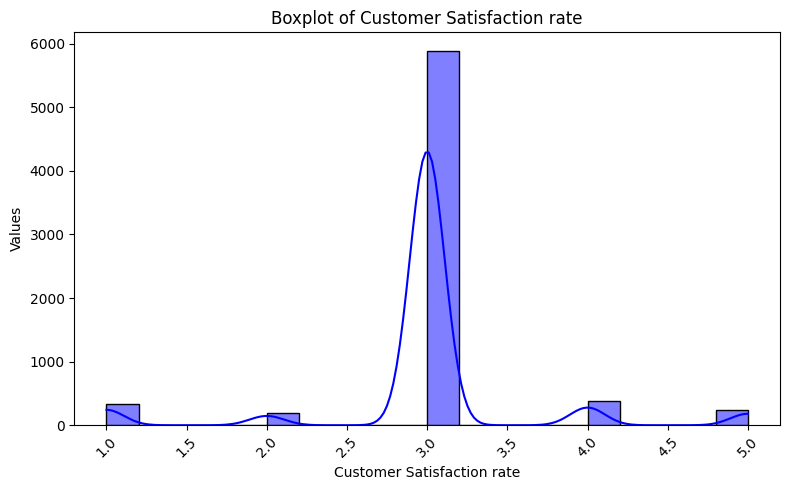

In [22]:
# Select numerical columns (both int and float)
numeric_cols = datas.select_dtypes(include=['int', 'float']).columns

# Create boxplots for numerical columns one by one
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=datas[col],bins=20, kde=True, color='blue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Histogram representation shows the outliers in Number of Referrals,Avg monthly GB download,Total Refund,Total Extra Data Charges,Total Long Distance Charges,P,opulation,Total Customer Svc Request,Product/Service Issues Reported,Customer Satisfaction rate

## <b>Finding The Outliers</b>

<b>Finding The Outliers of Number Of Referrals</b>

In [23]:
q1=datas['Number of Referrals'].quantile(0.25)
q3=datas['Number of Referrals'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Number of Referrals']<lowerbound)|(datas['Number of Referrals']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Number of Referrals'])


0.0
3.0
3.0
-4.5
7.5
253      8
317      9
477     10
480      9
481      9
        ..
6985    10
6995     8
7005     8
7013     9
7018     8
Name: Number of Referrals, Length: 676, dtype: int64


<b>Removing The Outliers Numerical of Referrals</b>

In [24]:
datas_no_outliers = datas[(datas['Number of Referrals'] >=lowerbound) & (datas['Number of Referrals'] <=upperbound)]


<b>Histogram of Number of Referrals after Removing Outliers

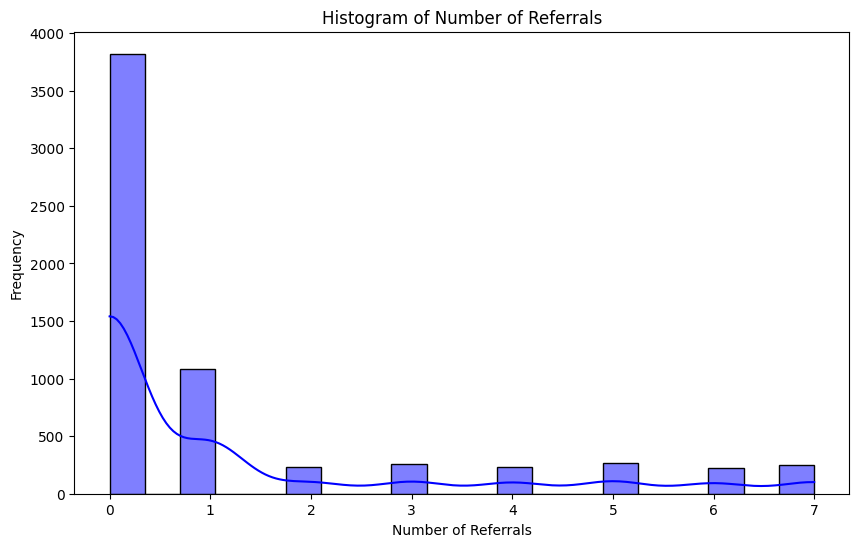

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Number of Referrals'], bins=20, kde=True, color='blue')

plt.title('Histogram of Number of Referrals')
plt.xlabel('Number of Referrals')
plt.ylabel('Frequency')

plt.show()

<b>Finding The Outliers of Avg Monthly GB Download</b>

In [26]:
q1=datas['Avg Monthly GB Download'].quantile(0.25)
q3=datas['Avg Monthly GB Download'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Avg Monthly GB Download']<lowerbound)|(datas['Avg Monthly GB Download']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Avg Monthly GB Download'])


25.0
-34.5
65.5
700     75
1147    76
1165    78
1175    80
1178    84
        ..
6975    73
6976    85
6997    76
6999    85
7006    76
Name: Avg Monthly GB Download, Length: 362, dtype: int64


<b>Removing the Outliers ofAvg Monthly GB Download'</b>

In [27]:
datas_no_outliers = datas[(datas['Avg Monthly GB Download'] >=lowerbound) & (datas['Avg Monthly GB Download']<=upperbound)]

<b>Histogram of Avg Monthly GB Download after Removing Outliers

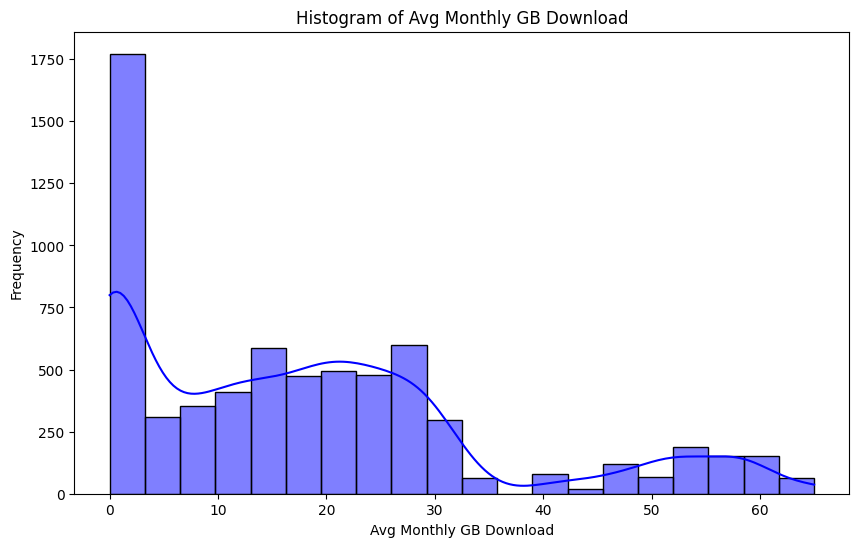

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Avg Monthly GB Download'], bins=20, kde=True, color='blue')

plt.title('Histogram of Avg Monthly GB Download')
plt.xlabel('Avg Monthly GB Download')
plt.ylabel('Frequency')

plt.show()

<b>Finding And Removing The Outliers Of Total Refunds And Draw the Histogram Of Total Refunds

0.0
0.0
0.0
2       45.61
3       13.43
7       40.95
9       11.05
111     29.84
        ...  
7037    40.41
7038    19.31
7039    48.23
7040    45.38
7041    27.24
Name: Total Refunds, Length: 525, dtype: float64


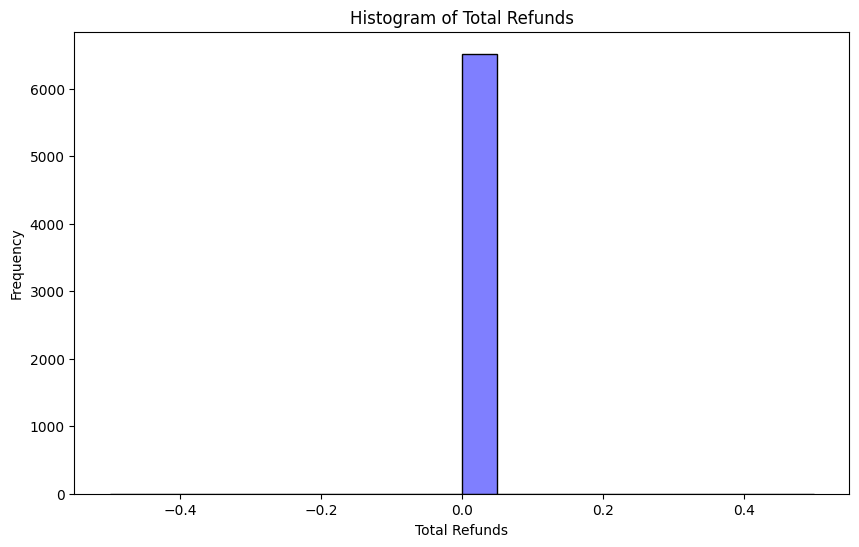

In [29]:
q1=datas['Total Refunds'].quantile(0.25)
q3=datas['Total Refunds'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Total Refunds']<lowerbound)|(datas['Total Refunds']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Total Refunds'])
datas_no_outliers = datas[(datas['Total Refunds'] >=lowerbound) & (datas['Total Refunds']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Total Refunds'], bins=20, kde=True, color='blue')

plt.title('Histogram of Total Refunds')
plt.xlabel('Total Refunds')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Total Extra Data Charges And Draw the Histogram Of Total Extra Data Charges

182.62
-273.93
456.55
7        689.0
38       753.0
45       579.0
47      1072.0
61      1149.0
         ...  
7014    1002.0
7018    1223.0
7019     481.0
7024     583.0
7040    4344.0
Name: Total Extra Data Charges, Length: 1190, dtype: float64


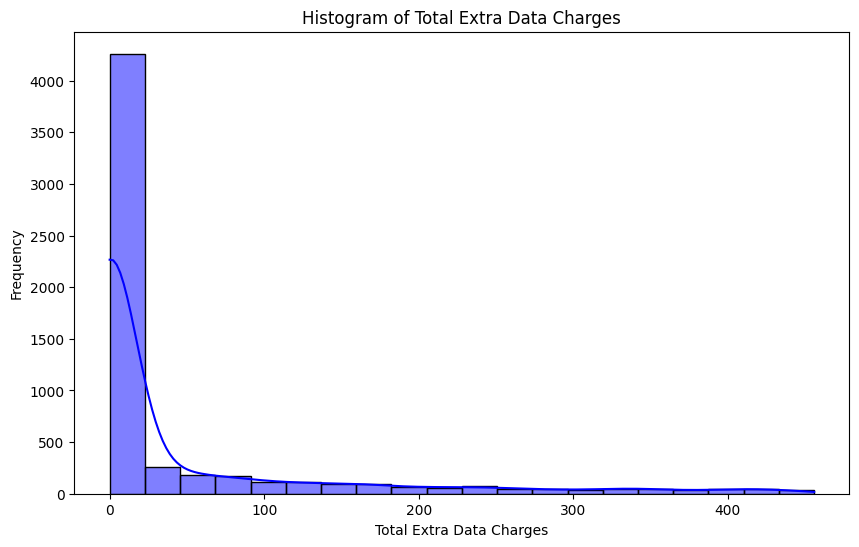

In [30]:

q1=datas['Total Extra Data Charges'].quantile(0.25)
q3=datas['Total Extra Data Charges'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Total Extra Data Charges']<lowerbound)|(datas['Total Extra Data Charges']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Total Extra Data Charges'])
datas_no_outliers = datas[(datas['Total Extra Data Charges'] >=lowerbound) & (datas['Total Extra Data Charges']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Total Extra Data Charges'], bins=20, kde=True, color='blue')

plt.title('Histogram of Total Extra Data Charges')
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Total Long Distance Charges And Draw the Histogram Of Total Long Distance Charges

1120.5549999999998
-1610.2874999999997
2871.9325
142     3372.72
278     3290.10
378     3170.86
404     3207.56
406     3225.42
         ...   
6936    3257.88
6951    3020.64
6961    3205.05
6977    2938.65
7018    3152.64
Name: Total Long Distance Charges, Length: 196, dtype: float64


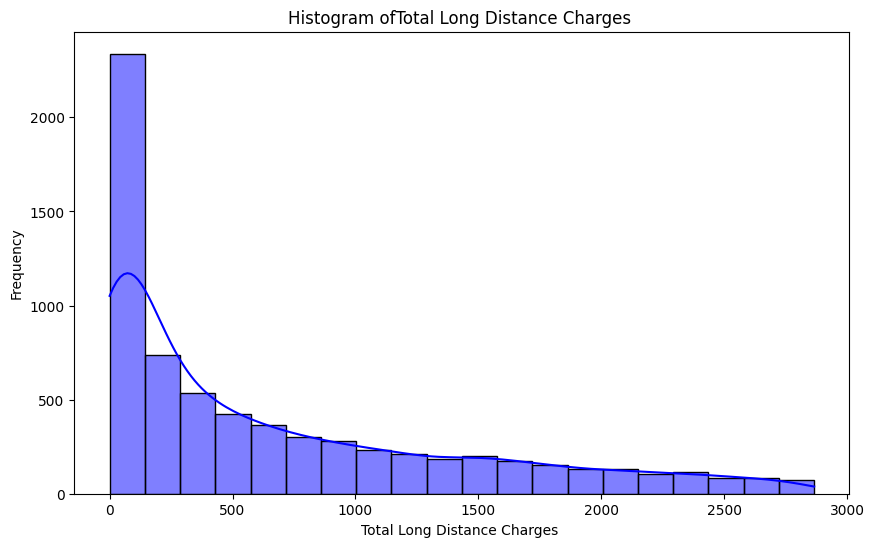

In [31]:
q1=datas['Total Long Distance Charges'].quantile(0.25)
q3=datas['Total Long Distance Charges'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Total Long Distance Charges']<lowerbound)|(datas['Total Long Distance Charges']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Total Long Distance Charges'])
datas_no_outliers = datas[(datas['Total Long Distance Charges'] >=lowerbound) & (datas['Total Long Distance Charges']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Total Long Distance Charges'], bins=20, kde=True, color='blue')

plt.title('Histogram ofTotal Long Distance Charges ')
plt.xlabel('Total Long Distance Charges ')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Population And Draw the Histogram Of Population

33781.0
-48327.5
86796.5
327      87383
454      97318
485      93315
637     101215
950      93315
951      96267
1323     90891
1485     93315
1510     97318
2119    101215
2309     90891
2473     91664
2540    101215
2559     87383
2572    105285
2595     96267
2619    103214
2635     91664
2672     97318
2751     98239
2895     88230
2901     91188
3618     87383
3630    105285
3650     96267
3673    103214
3690     91664
3809     98239
3956     88230
3961     91188
4204     90891
4679    101215
4697     87383
4706    105285
4716     93315
4727     96267
4749    103214
4767     91664
4799     97318
4877     98239
5026     88230
5031     91188
5274     90891
5762    105285
5802    103214
5822     91664
5852     97318
5933     98239
6084     88230
6090     91188
6768    101215
6788     87383
6803    105285
6816     93315
6829     96267
6851    103214
6980     98239
Name: Population, dtype: int64


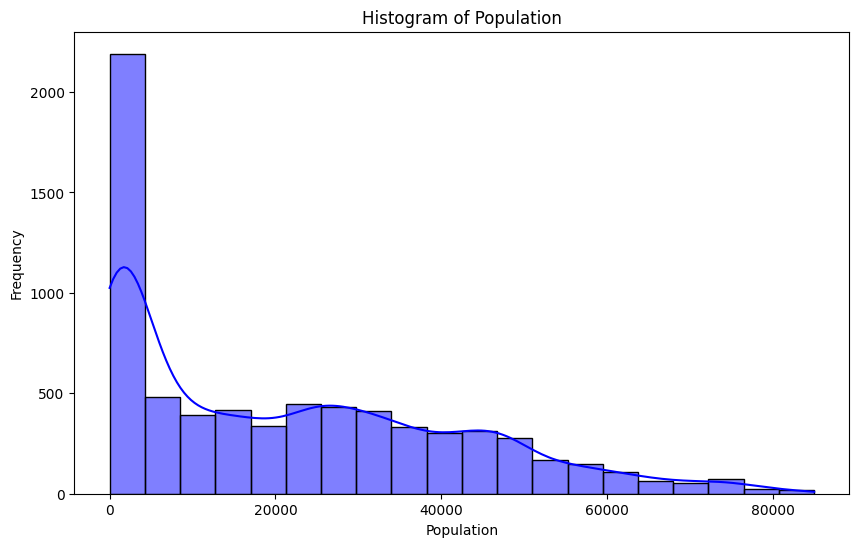

In [32]:
q1=datas['Population'].quantile(0.25)
q3=datas['Population'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Population']<lowerbound)|(datas['Population']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Population'])
datas_no_outliers = datas[(datas['Population'] >=lowerbound) & (datas['Population']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Population'], bins=20, kde=True, color='blue')

plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Total Long Distance Charges' And Draw the Histogram Of Total Long Distance Charges'</b>

1120.5549999999998
-1610.2874999999997
2871.9325
142     3372.72
278     3290.10
378     3170.86
404     3207.56
406     3225.42
         ...   
6936    3257.88
6951    3020.64
6961    3205.05
6977    2938.65
7018    3152.64
Name: Total Long Distance Charges, Length: 196, dtype: float64


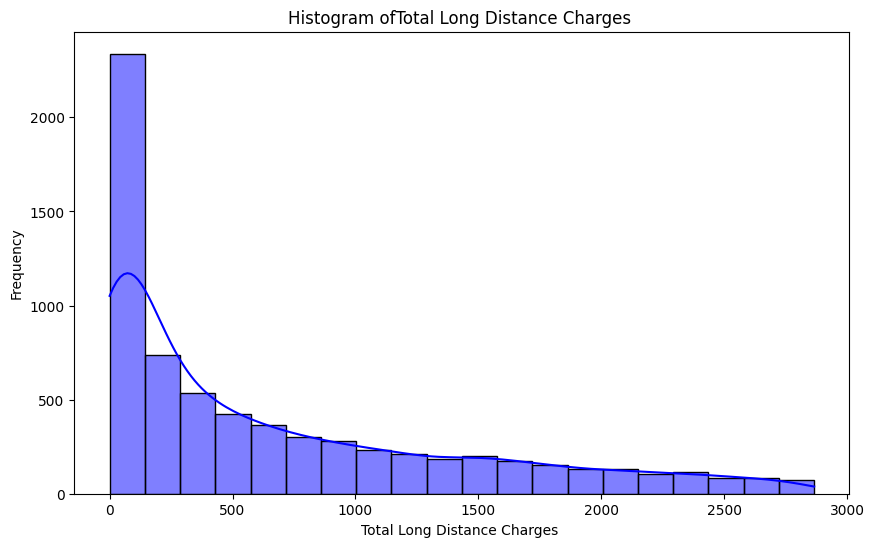

In [33]:
q1=datas['Total Long Distance Charges'].quantile(0.25)
q3=datas['Total Long Distance Charges'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Total Long Distance Charges']<lowerbound)|(datas['Total Long Distance Charges']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Total Long Distance Charges'])
datas_no_outliers = datas[(datas['Total Long Distance Charges'] >=lowerbound) & (datas['Total Long Distance Charges']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Total Long Distance Charges'], bins=20, kde=True, color='blue')

plt.title('Histogram ofTotal Long Distance Charges ')
plt.xlabel('Total Long Distance Charges ')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Total Customer Svc Requests And Draw the Histogram Of Total Customer Svc Requests</b>

0.0
0.0
0.0
3       1
7       1
10      2
13      1
14      2
       ..
6995    1
7008    1
7027    1
7029    1
7042    2
Name: Product/Service Issues Reported, Length: 1422, dtype: int64


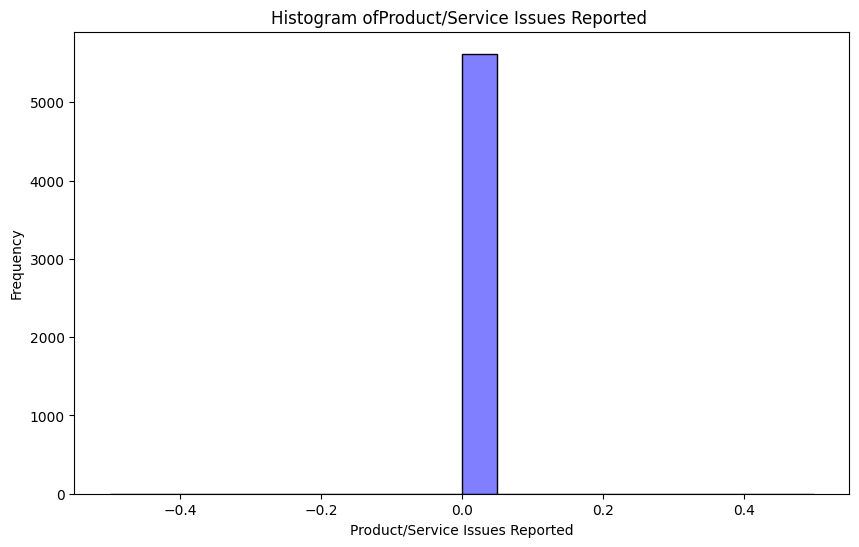

In [34]:
q1=datas['Product/Service Issues Reported'].quantile(0.25)
q3=datas['Product/Service Issues Reported'].quantile(0.75)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Product/Service Issues Reported']<lowerbound)|(datas['Product/Service Issues Reported']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Product/Service Issues Reported'])
datas_no_outliers = datas[(datas['Product/Service Issues Reported'] >=lowerbound) & (datas['Product/Service Issues Reported']<=upperbound)]
plt.figure(figsize=(10, 6))
sns.histplot(datas_no_outliers['Product/Service Issues Reported'], bins=20, kde=True, color='blue')

plt.title('Histogram ofProduct/Service Issues Reported ')
plt.xlabel('Product/Service Issues Reported')
plt.ylabel('Frequency')

plt.show()




<b>Finding And Removing The Outliers Of Customer Satisfaction rate And Draw the Histogram Of Customer Satisfaction rate</b>

In [35]:
q1=datas['Customer Satisfaction rate'].quantile(0.25)
q3=datas['Customer Satisfaction rate'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
lowerbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
outliers=datas[(datas['Customer Satisfaction rate']<lowerbound)|(datas['Customer Satisfaction rate']>upperbound)]
print(iqr)
print(lowerbound)
print(upperbound)

print(outliers['Customer Satisfaction rate'])
datas_no_outliers = datas[(datas['Customer Satisfaction rate'] >=lowerbound) & (datas['Customer Satisfaction rate']<=upperbound)]



3.0
3.0
0.0
3.0
3.0
3       2.0
4       2.0
7       1.0
8       2.0
10      1.0
       ... 
7008    4.0
7011    4.0
7017    5.0
7029    5.0
7040    4.0
Name: Customer Satisfaction rate, Length: 1159, dtype: float64


## <b>Encoding

<b>One Hot Encoding

In [36]:
datas_encoded=pd.get_dummies(datas,drop_first=True)
print(datas_encoded)

      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        9   
1                                 48.85                       19   
2                                 11.33                       57   
3                                 19.76                       13   
4                                  6.33                       15   
...                        

<b><font color=green>
Advantage</font>s:
Maintains the distinctiveness of categories without imposing ordinal relationships.
Suitable for categorical variables with no inherent order among categories.
Helps prevent the model from assigning unintended ordinality to categor<b>ies.
Considetions:
Increases the dimensionality of the dataset, especially when dealing with many unique categories in a column.
May not be suitable for high-cardinality categorical variables (variables with many unique categories) due to the curse of dimensionality.

In [37]:
# Convert dummy variables to integers (1s and 0s)
dummy_datas_numeric = datas_encoded.astype(int)
print(dummy_datas_numeric)


      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                     0                        9   
1                                    48                       19   
2                                    11                       57   
3                                    19                       13   
4                                     6                       15   
...                        

The encoded dataset have some values False Or True values.so here convert the values into INT

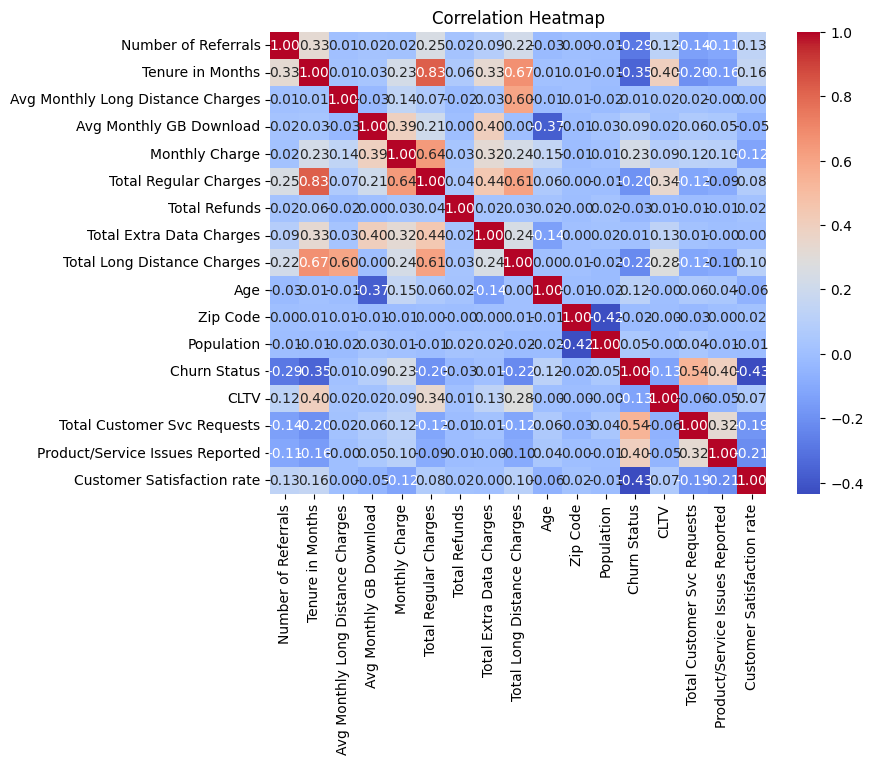

In [38]:
corr_matrix = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<b> in heat map dark color represent the positive correlation,light color represent the negative correlation,Zero represent Nocorrelation
Tenure in month and Total Regular Recharge are  positively correlated. Churn status and Customer Satisfaction rate is negatively correlated.1 in the diagonal reppresent the self correlation features

## Visualization Step

## Visualization Using By POWER BI

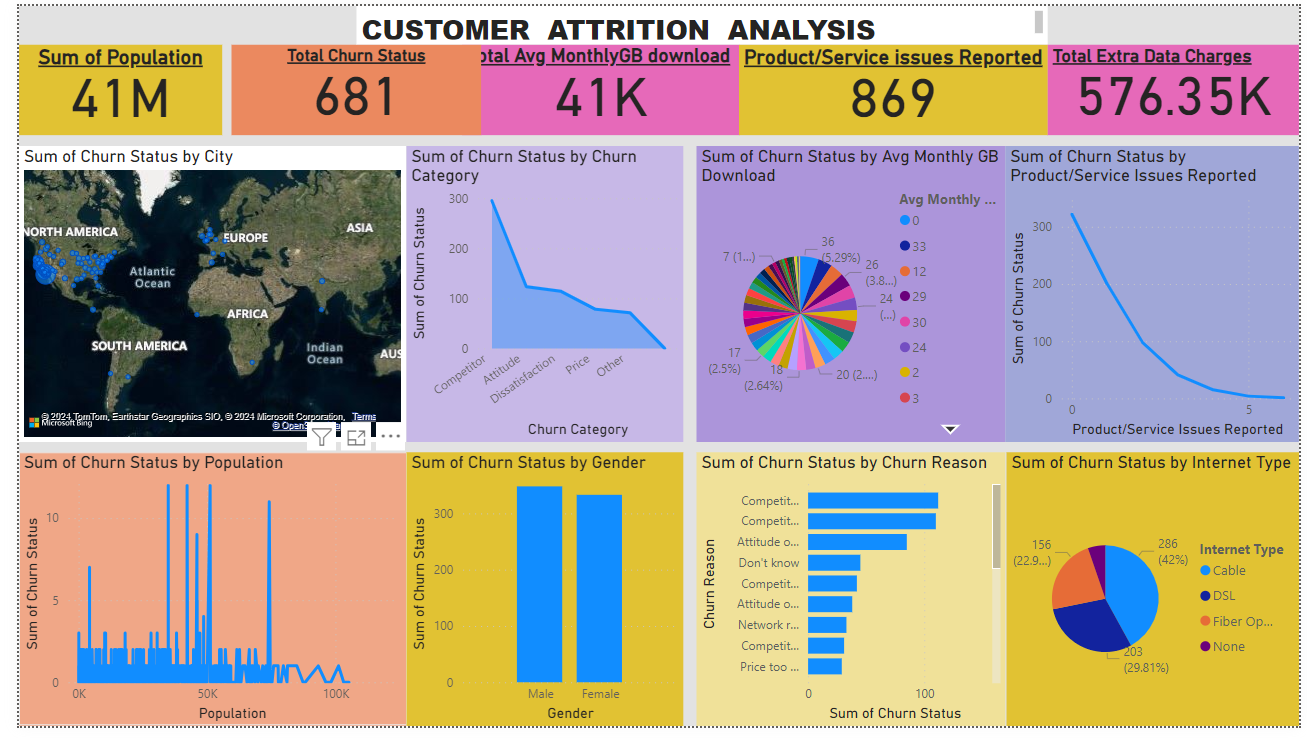

In [73]:
from IPython.display import Image
Image(filename='C:\\Users\\LENOVO\\Desktop\\CUSTOMER SCREEN1.png')

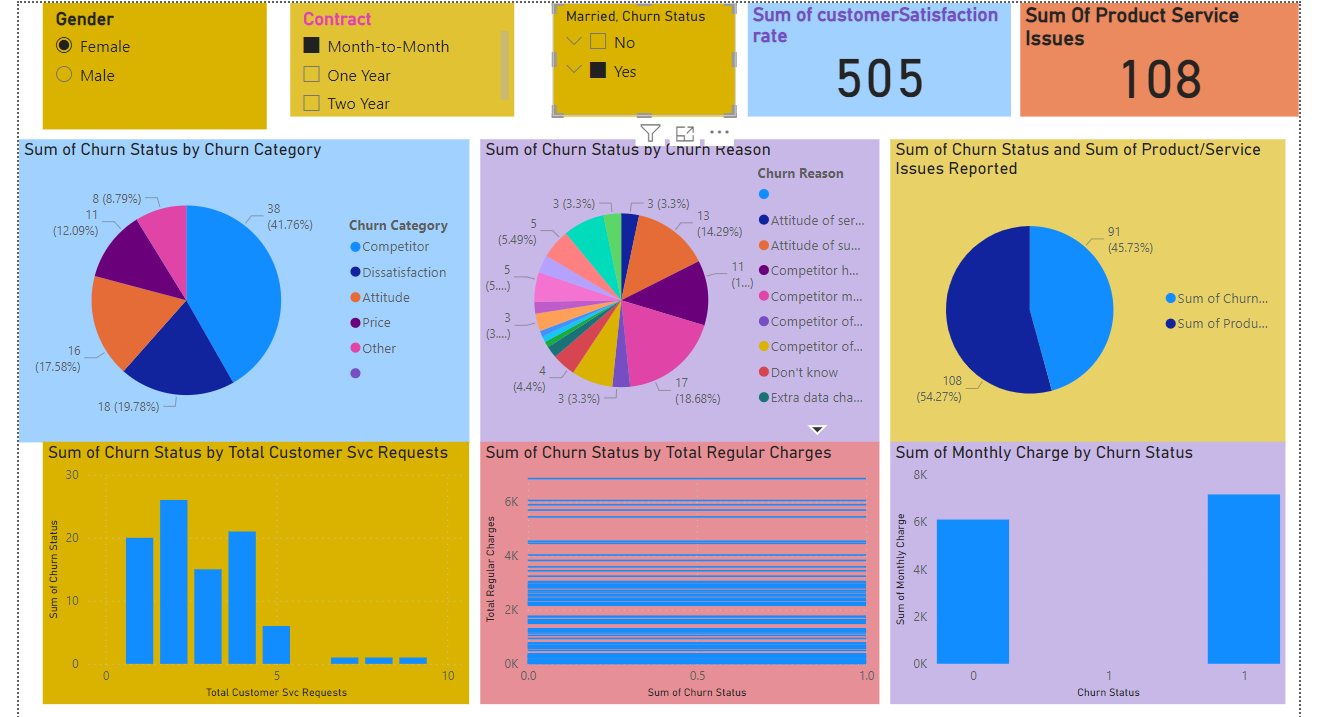

In [75]:
from IPython.display import Image
Image(filename="C:\\Users\\LENOVO\\Desktop\\CUSTOMER SCREEN 2.png")

###  Churn Status high in Male Category, Churn status very high inthe churn category is Competitor, Sum of the churn status high in the Internet type is Cable.Sum of Preoduct issued report is 54.27%.

## Visualization by PYTHON

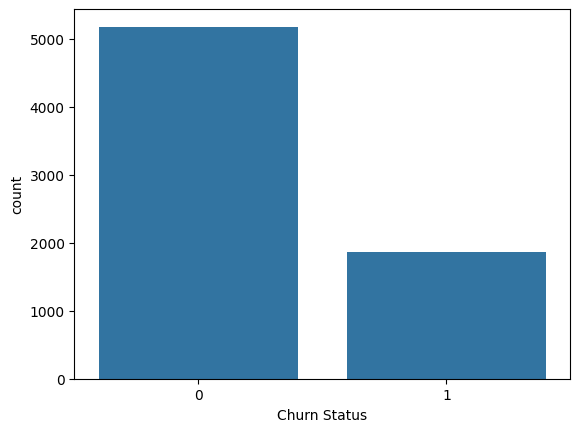

In [78]:
# Visualize churn distribution
sns.countplot(x='Churn Status', data=datas)
plt.show()

####  This plot will show the count of each category in the Churn column, which typically represents whether a customer has churned (left the service) or not.
 <b>
If Churn is a binary variable with values like 0 and 1, where 0 represents customers who have not churned and 1 represents customers who have churned, the count plot will display the number of customers in each category.

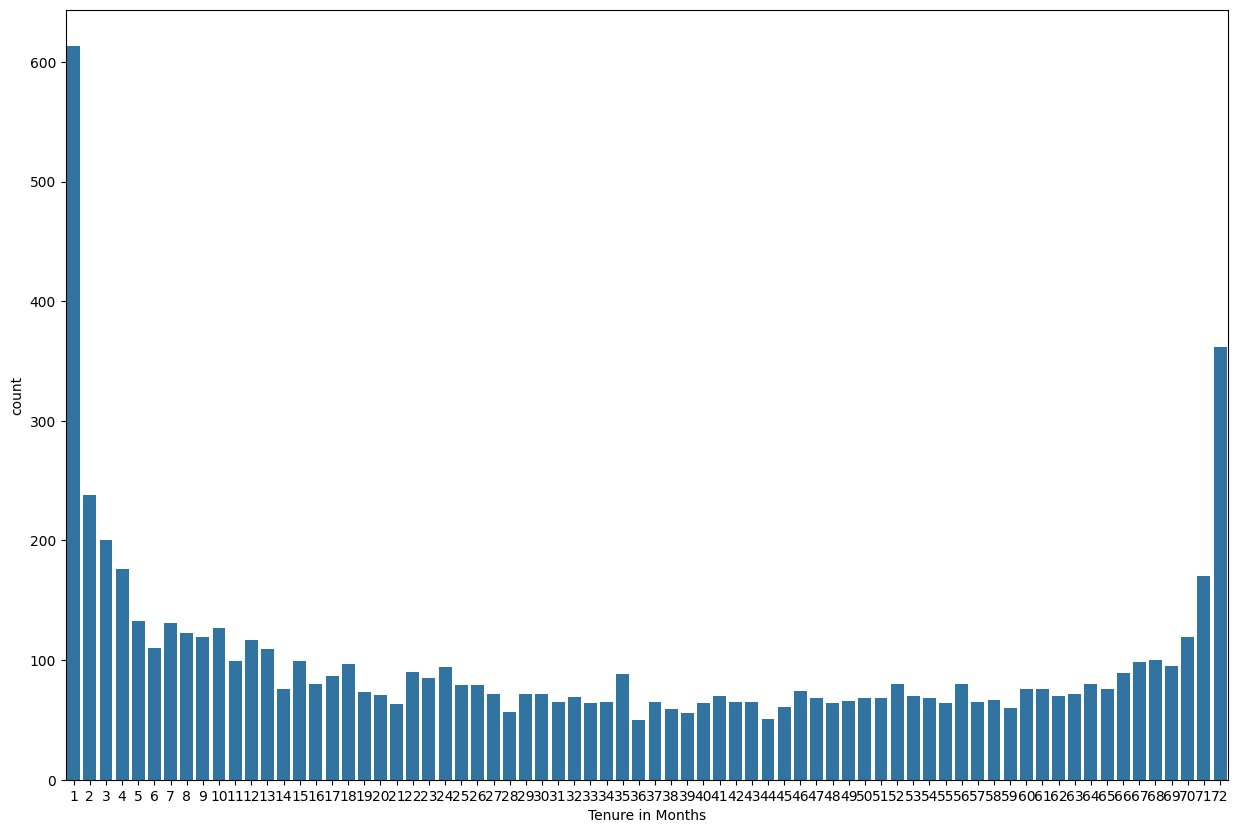

In [40]:
plt.figure(figsize=(15, 10)) 
sns.countplot(x='Tenure in Months', data=datas)
plt.show()

In [41]:
datas['Offer'].unique()

array(['Offer B', 'Offer E', 'Offer D', 'Offer C', 'Offer A'],
      dtype=object)

####  Unique values in Offer Coloumn is Offer B', 'Offer E', 'Offer D', 'Offer C', 'Offer A

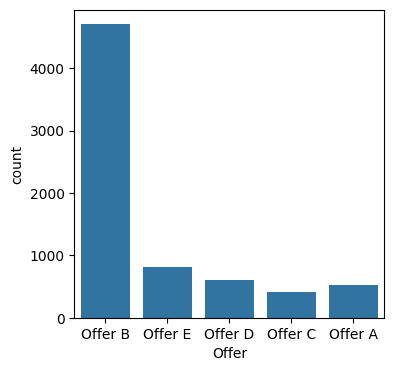

In [42]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Offer', data=datas)
plt.show()

In [43]:
datas['Internet Service'].unique()

array(['Yes', 'No'], dtype=object)

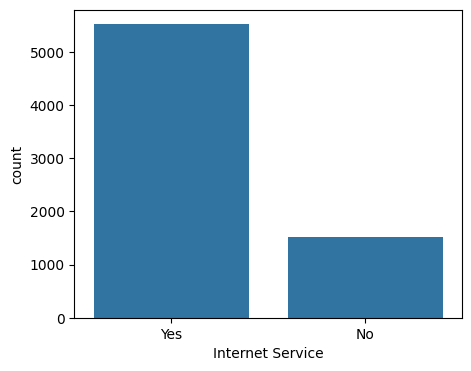

In [44]:
plt.figure(figsize=(5,4))
sns.countplot(x='Internet Service', data=datas)
plt.show()

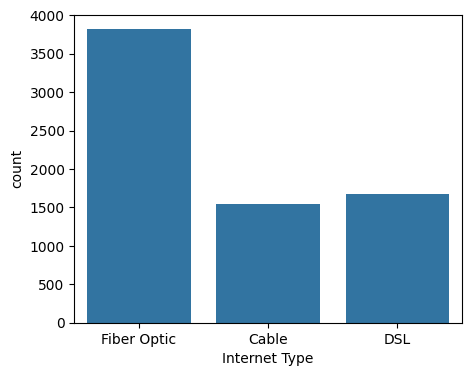

In [45]:
plt.figure(figsize=(5,4))
sns.countplot(x='Internet Type', data=datas)
plt.show()

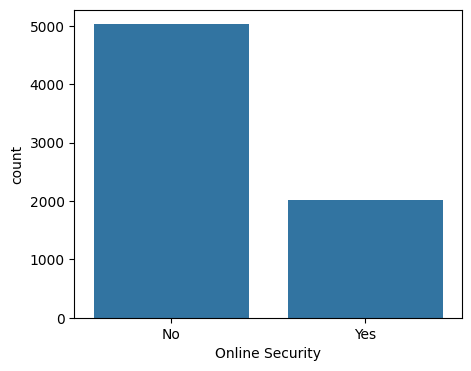

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x='Online Security', data=datas)
plt.show()


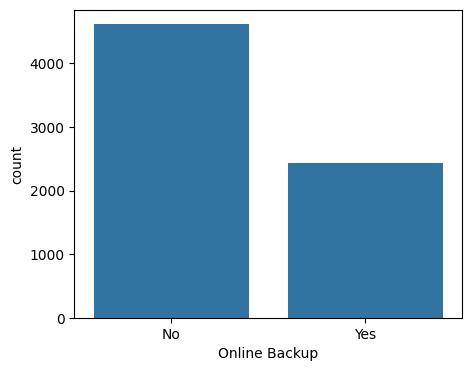

In [47]:
plt.figure(figsize=(5,4))
sns.countplot(x='Online Backup', data=datas)
plt.show()


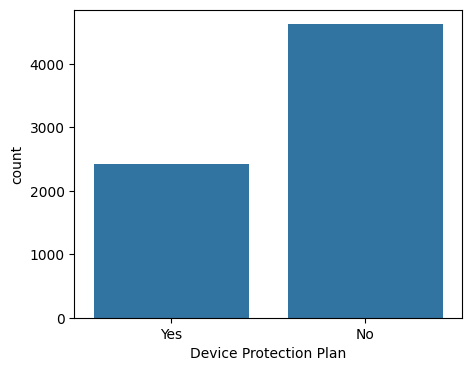

In [48]:
plt.figure(figsize=(5,4))
sns.countplot(x='Device Protection Plan', data=datas)
plt.show()


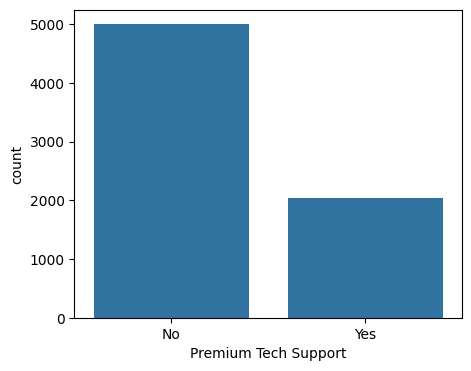

In [49]:
plt.figure(figsize=(5,4))
sns.countplot(x='Premium Tech Support', data=datas)
plt.show()


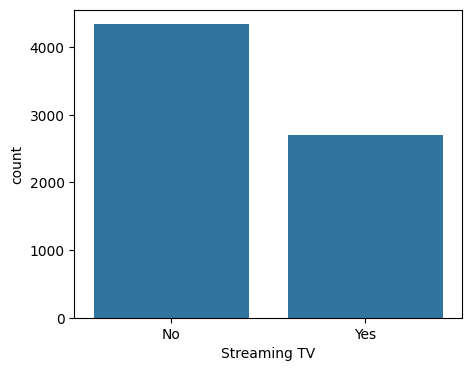

In [50]:
plt.figure(figsize=(5,4))
sns.countplot(x='Streaming TV', data=datas)
plt.show()


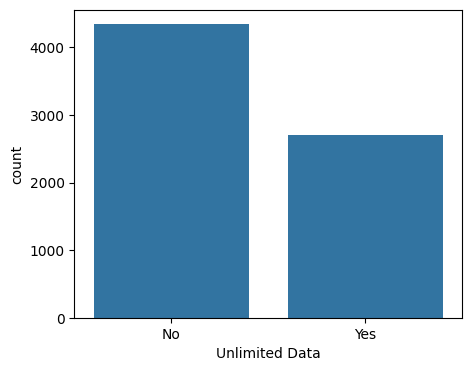

In [51]:
plt.figure(figsize=(5,4))
sns.countplot(x='Unlimited Data', data=datas)
plt.show()


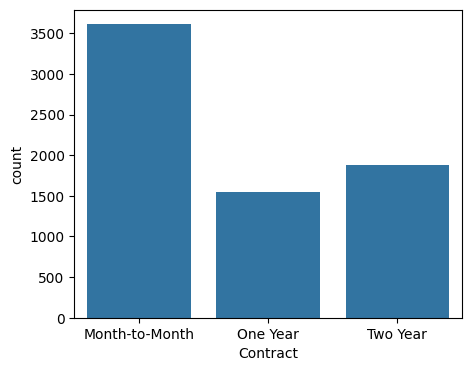

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(x='Contract', data=datas)
plt.show()


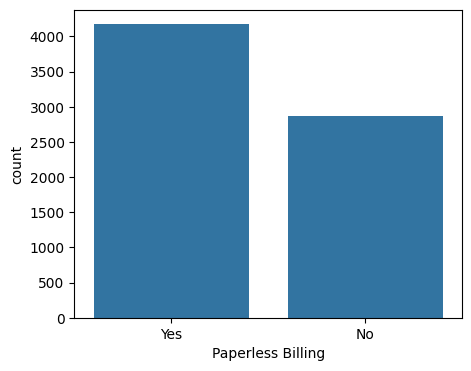

In [53]:
plt.figure(figsize=(5,4))
sns.countplot(x='Paperless Billing', data=datas)
plt.show()


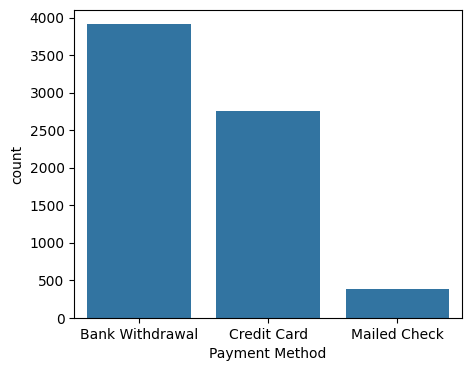

In [54]:
plt.figure(figsize=(5,4))
sns.countplot(x='Payment Method', data=datas)
plt.show()


In [55]:
datas['City'].unique()

array(['Los Angeles', 'Inglewood', 'Whittier', ..., 'Topaz', 'Jacumba',
       'Holtville'], dtype=object)

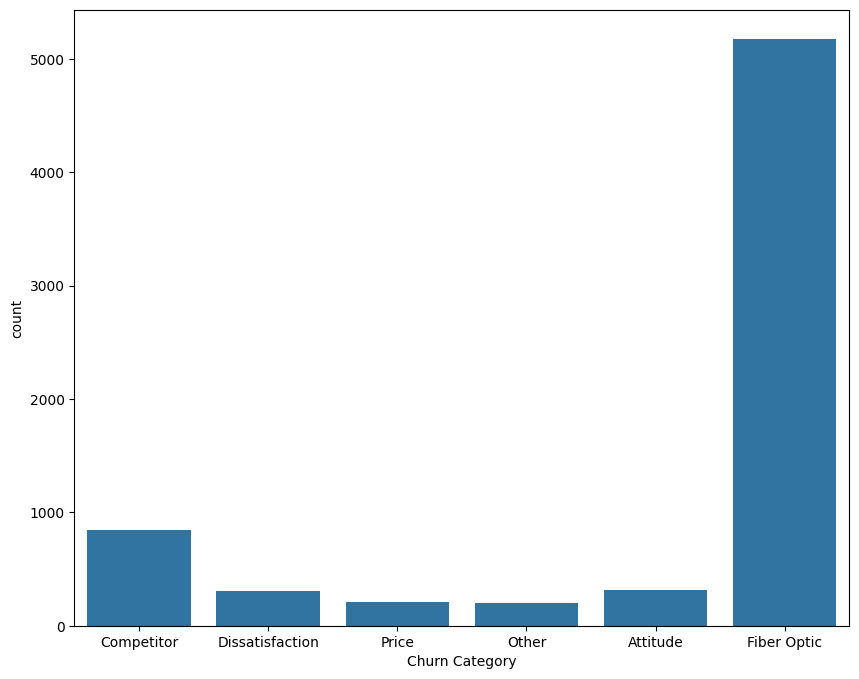

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn Category', data=datas)
plt.show()


In [57]:
datas['Churn Reason'].mode()

0    Fiber Optic
Name: Churn Reason, dtype: object

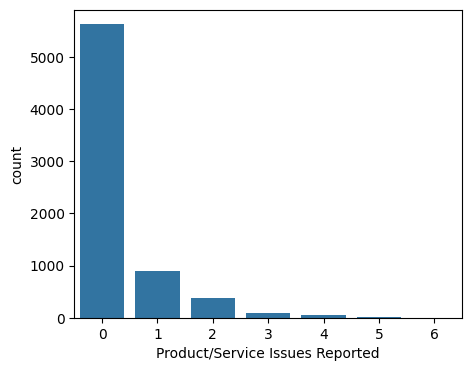

In [58]:
plt.figure(figsize=(5,4))
sns.countplot(x='Product/Service Issues Reported', data=datas)
plt.show()


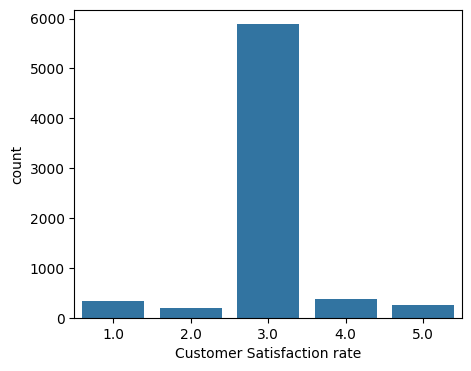

In [59]:
plt.figure(figsize=(5,4))
sns.countplot(x='Customer Satisfaction rate', data=datas)
plt.show()


### <font color=blue> Separate features and target variable

In [60]:
X = datas_encoded.drop(columns=['Churn Status'])
y = datas_encoded['Churn Status']
print(X)


      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
2                       0                18   
3                       1                25   
4                       1                37   
...                   ...               ...   
7038                    0                72   
7039                    1                24   
7040                    4                72   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        9   
1                                 48.85                       19   
2                                 11.33                       57   
3                                 19.76                       13   
4                                  6.33                       15   
...                        

In [61]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Status, Length: 7043, dtype: int64


### <font color=blue> Split data into training and testing sets</font>

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [63]:
print(X_train)


      Number of Referrals  Tenure in Months  \
2142                    0                35   
1623                    0                 1   
6074                    4                35   
1362                    0                 7   
6754                    8                68   
...                   ...               ...   
3772                    0                 1   
5191                    0                40   
5226                    0                21   
5390                    0                16   
860                     8                 7   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
2142                              25.51                       18   
1623                               0.00                       32   
6074                              41.02                        0   
1362                              21.58                       78   
6754                              17.12                        0   
...                        

In [64]:
print(y_train)

2142    1
1623    1
6074    0
1362    1
6754    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Churn Status, Length: 5634, dtype: int64


### <font color=blue> Standardize features

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####  StandardScaler from scikit-learn to scale your numerical features in both the training and testing datasets. Scaling features is important.

# <b>Model Building and Evaluation

### <b> Logistic Regression Model

In [66]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Build and train logistic regression model
lr_model=LogisticRegression(solver='liblinear',random_state=42)
lr_model.fit(X_train,y_train)
# Make predictions
lr_y_pred=lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')



Logistic Regression Accuracy: 1.00


#### accuracy_score(y_test, lr_y_pred) calculates the accuracy of the logistic regression model lr_model predictions (lr_y_pred) on the test data (X_test_scaled).
<b>
Accuracy is the ratio of correctly predicted instances to the total instances in the test set.
The accuracy is printed with two decimal places using :.2f in the formatted string.

### Print classification report and confusion matrix

In [103]:
print(classification_report(y_test, lr_y_pred))
report = classification_report(y_test, lr_y_pred, output_dict=True)

# Convert classification report to pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame using pandas styling for a table-like appearance
styled_table = df_report.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])
styled_table


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       0.99      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



,precision,recall,f1-score,support
0,1.000000,0.996036,0.998014,1009.000000
1,0.990099,1.000000,0.995025,400.000000
accuracy,0.997161,0.997161,0.997161,0.997161
macro avg,0.995050,0.998018,0.996519,1409.000000
weighted avg,0.997189,0.997161,0.997165,1409.000000


<b> classification_report(y_test, lr_y_pred) generates a comprehensive classification report that includes precision, recall, F1-score, and support for each class and overall accuracy.
<b> 
Precision is the ratio of true positive predictions to the total predicted positives. 
Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the actual positives.
F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
Support is the number of actual occurrences of the class in the test data.

In [68]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, lr_y_pred))


Confusion Matrix:
[[1005    4]
 [   0  400]]


The top-left cell (565) represents the true positives (TP), which are the number of instances correctly predicted as positive (e.g., correctly predicted churned customers). d).d

The bottom-right cell (339) represents the true negatives (TN), which are the number of instances correctly predicted as negative (e.g., correctly predicted non-churned customers).

The top-left cell (565) represents the true positives (TP), which are the number of instances correctly predicted as positive (e.g., correctly predicted churned customers). d).d).



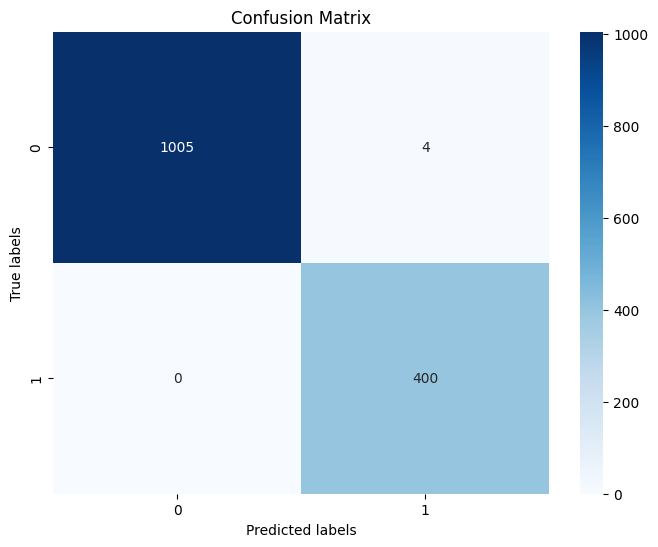

In [69]:
conf_matrix = confusion_matrix(y_test,lr_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Graphical representation of Confusion matrix

### Random Forest Classifier

In [70]:
# Build and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# Print classification report and confusion matrix
print(classification_report(y_test, rf_y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_y_pred))


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   0  400]]


In [102]:
report = classification_report(y_test, rf_y_pred, output_dict=True)

# Convert classification report to pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame using pandas styling for a table-like appearance
styled_table = df_report.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])
styled_table

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,1009.000000
1,1.000000,1.000000,1.000000,400.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,1409.000000
weighted avg,1.000000,1.000000,1.000000,1409.000000


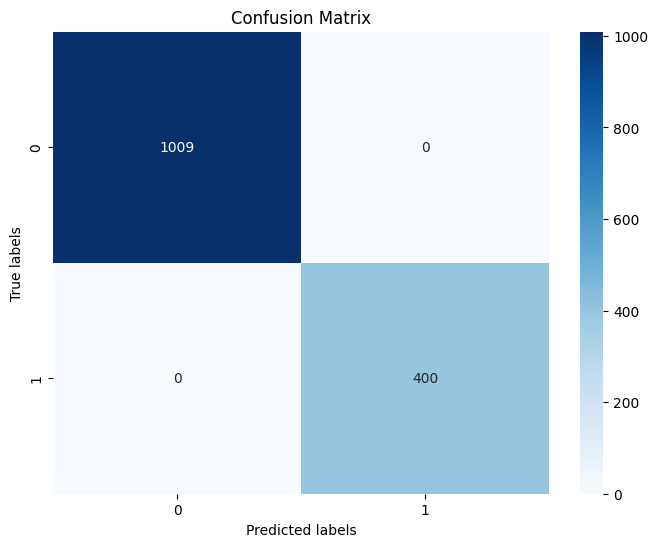

In [71]:
conf_matrix = confusion_matrix(y_test,rf_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

###   SVM Classifier

In [77]:
# Build and train SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Print classification report and confusion matrix
print(classification_report(y_test, svm_y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, svm_y_pred))


SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   3  397]]


In [99]:
report = classification_report(y_test, svm_y_pred, output_dict=True)

# Convert classification report to pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame using pandas styling for a table-like appearance
styled_table = df_report.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])
styled_table

,precision,recall,f1-score,support
0,0.997036,1.000000,0.998516,1009.000000
1,1.000000,0.992500,0.996236,400.000000
accuracy,0.997871,0.997871,0.997871,0.997871
macro avg,0.998518,0.996250,0.997376,1409.000000
weighted avg,0.997877,0.997871,0.997868,1409.000000


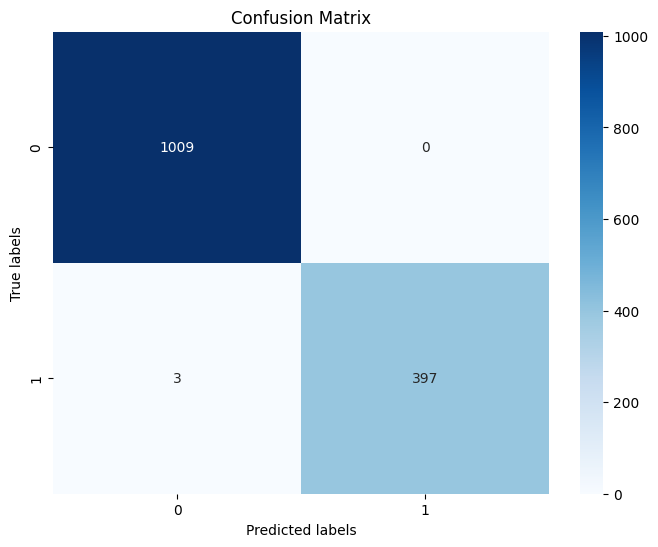

In [95]:
conf_matrix = confusion_matrix(y_test,svm_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

###  DecisionTree

In [80]:
# Build and train DecisionTressClassifier
dsc_model = DecisionTreeClassifier(random_state=42)
dsc_model.fit(X_train_scaled, y_train)

# Make predictions
dsc_y_pred = svm_model.predict(X_test_scaled)

# Evaluate model
Accuracy = accuracy_score(y_test, dsc_y_pred)
print(f'Accuracy: {Accuracy:.2f}')

# Print classification report and confusion matrix
print(classification_report(y_test, dsc_y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, dsc_y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
[[1009    0]
 [   3  397]]


In [100]:
report = classification_report(y_test, dsc_y_pred, output_dict=True)

# Convert classification report to pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame using pandas styling for a table-like appearance
styled_table = df_report.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])
styled_table

,precision,recall,f1-score,support
0,0.997036,1.000000,0.998516,1009.000000
1,1.000000,0.992500,0.996236,400.000000
accuracy,0.997871,0.997871,0.997871,0.997871
macro avg,0.998518,0.996250,0.997376,1409.000000
weighted avg,0.997877,0.997871,0.997868,1409.000000


In [ ]:
conf_matrix = confusion_matrix(y_test,dsc_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Gaussian Naive Bayes

In [101]:
naive_bayes_model = GaussianNB()

naive_bayes_model .fit(X_train_scaled, y_train)

# Make predictions
naive_y_pred = naive_bayes_model .predict(X_test_scaled)

# Evaluate model
Accuracy = accuracy_score(y_test, naive_y_pred)
print(f'Accuracy: {Accuracy:.2f}')

# Print classification report and confusion matrix
classreport=classification_report(y_test, naive_y_pred)
report = classification_report(y_test, naive_y_pred, output_dict=True)

# Convert classification report to pandas DataFrame for better formatting
df_report = pd.DataFrame(report).transpose()

# Display the DataFrame using pandas styling for a table-like appearance
styled_table = df_report.style.set_table_styles([{'selector': 'th', 'props': [('background-color', '#f2f2f2')]}])
styled_table
print(classreport)
print('Confusion Matrix:')
conf_matrix=confusion_matrix(y_test, naive_y_pred)

print(conf_matrix)



Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1009
           1       0.89      0.74      0.81       400

    accuracy                           0.90      1409
   macro avg       0.90      0.85      0.87      1409
weighted avg       0.90      0.90      0.90      1409

Confusion Matrix:
[[974  35]
 [103 297]]


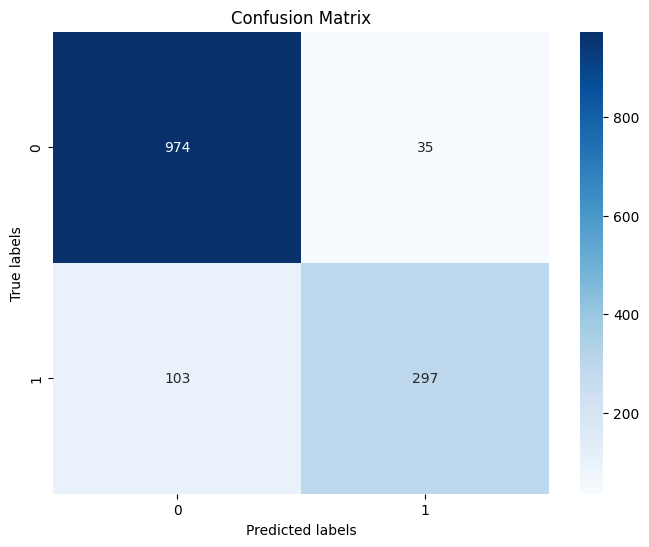

In [82]:
conf_matrix = confusion_matrix(y_test,naive_y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### "After evaluating several classification algorithms for our churn prediction task, we selected the Random Forest algorithm. Its high accuracy (1) and balanced precision-recall scores aligned well with our goal of reducing customer churn while ensuring reliable predictions.


### Choosing a Random Forest Model can be a strategic decision based on several factors:

####  Interpretability:  Random Forest Model provides easily interpretable results, making it valuable when understanding the impact of features on the target variable is essential.

#### Efficiency: It is computationally efficient and can handle large datasets with relative ease compared to more complex models.

#### Binary Classification:Random Forest Model is well-suited for binary classification tasks (predicting yes/no, 1/0 outcomes), making it ideal for scenarios like churn prediction, fraud detection, or medical diagnostics.

#### Probabilistic Interpretation: Random Forest models provide probabilities of class membership, allowing for threshold adjustments and fine-tuning based on business needs.


#### Low Variance: Random Forest Model tends to have lower variance, making it less prone to overfitting on small or noisy datasets.

#####  <b>Overall, choosing Random Forest Model is advantageous when prioritizing model transparency, computational efficiency, and having a clear understanding of feature contributions in a binary classification context.

### <b>Project Report: Predicting Customer Churn for Verizonet

<b>Introduction

<b>Overview of project objectives:</b> Predict customer churn for Verizonet to improve retention strategies.
Importance: Addressing high customer attrition rates amidst competitive challenges.
Data Collection and Preprocessing

<b>Dataset description:</b> Source, features, target variable (customer churn).
Preprocessing steps: Handling missing values, encoding categorical variables, and feature engineering.
<p><b>Exploratory Data Analysis (EDA)</b>

Summary statistics, distributions, and correlations analysis.
Insights: Identification of key trends, patterns, and potential predictors of churn.
<p><b>Feature Selection and Engineering</b>

Selection rationale for features impacting churn prediction.
Engineered features: e.g., tenure calculation, usage metrics aggregation.
<p><b>Model Development and Evaluation</b>b>

Algorithm choice:  Random Forest Model for interpretability and effectiveness.
Model training, hyperparameter tuning, and performance evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC).
Confusion matrix analysis: Model's ability to predict churn accurately.
<p><b>Model Interpretation and Insights</b>

Feature importance analysis: Insights into significant predictors of churn.
Actionable insights: Targeted retention strategies based on model findings.
Next Steps and Recommendations

<p><b>Model enhancement strategies:</b>b> Ensemble methods, additional feature engineering.
Real-time deployment and integration: Monitoring for proactive churn management.
Continuous improvement: Ongoing validation, refinement, and alignment with business goals.
Visualizations and Charts

Inclusion of relevant visualizations (EDA plots, confusion matrix heatmap, feature importance) for clear communication and understanding.
Conclusion

Recap of key findings, model performance, and actionable insights for Verizonet.
Importance of the churn prediction model for enhancing customer retention and business sustainability.
Commitment to data-driven decision-making and continuous improvement.